# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data.**
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline

2024-04-08 21:07:35.935496: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Question 1
1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data.**

# Solution to Question 1

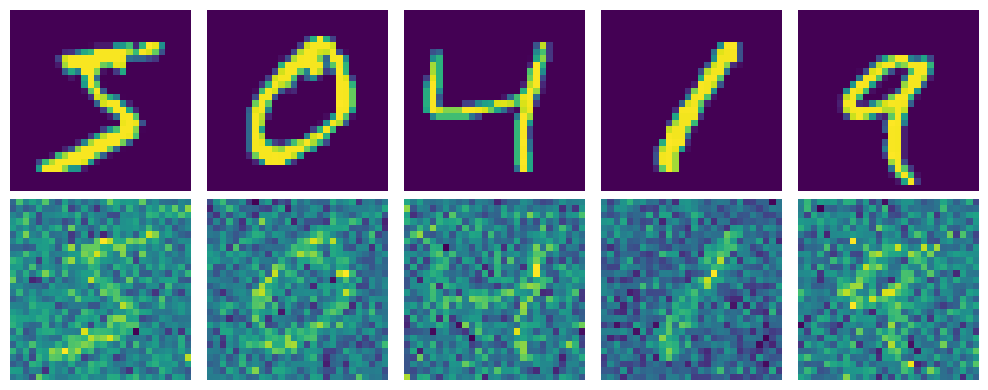

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# reshape datasets
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)


# scale of the noise
noise_scale = 0.5

# Add noise to the training data
noise = noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape)
noisy_x_train_flat = x_train_flat + noise

# setup images by 2x5
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  

# Loop: see 1st 5 images without noise
for i in range(5):
    axes[0, i].imshow(x_train[i])
    axes[0, i].axis('off')  # Turn off the axis labels

# Loop: see 1st 5 images WITH noise
for i in range(5):
    axes[1, i].imshow(noisy_x_train_flat[i].reshape(28, 28))
    axes[1, i].axis('off')  # Turn off the axis labels

# show images
plt.tight_layout()
plt.show()


# Question 2
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

# Solution to Question 2
Conv Net Model w/Noise: Loss = 155% and Accuracy = 73% 

Conv Net Model w/o Noise: Loss = 84% and Accurancy = 82%

## Conv Net Model: w/ Noise

### Noise Added Function

In [6]:
# Noise is added here
# The max value of the noise should not grossly surpass 1.0

# create function to loop thru for Question 3

# scale of the noise
noise_scale = 0.5

# add_noise function
def add_noise(data, noise_scale=noise_scale):
    noisy_images = data + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    return noisy_images

noisy_x_train = add_noise(x_train, noise_scale=noise_scale)
noisy_x_test = add_noise(x_test, noise_scale=noise_scale)

In [9]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape (define input_shape)
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(noisy_x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_x_test, y_test))
score = model.evaluate(noisy_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 164ms/step - accuracy: 0.1051 - loss: 2.3172 - val_accuracy: 0.1434 - val_loss: 2.2780
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - accuracy: 0.1312 - loss: 2.2872 - val_accuracy: 0.2639 - val_loss: 2.2544
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 179ms/step - accuracy: 0.1634 - loss: 2.2633 - val_accuracy: 0.3686 - val_loss: 2.2278
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - accuracy: 0.1963 - loss: 2.2411 - val_accuracy: 0.4512 - val_loss: 2.1959
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 185ms/step - accuracy: 0.2315 - loss: 2.2104 - val_accuracy: 0.5125 - val_loss: 2.1561
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 166ms/step - accuracy: 0.2693 - loss: 2.1735 - val_accuracy: 0.5720 - val_loss: 2.1070
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 164ms/step - accuracy: 0.3033 - loss: 2.1336 - val_accuracy: 0.6067 - val_loss: 2.0461
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 156ms/step - accuracy: 0.3499 - loss: 2

## Conv Net Model: w/o Noise

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# defining input_shape
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 177ms/step - accuracy: 0.1357 - loss: 2.2898 - val_accuracy: 0.3381 - val_loss: 2.2526
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 179ms/step - accuracy: 0.2360 - loss: 2.2470 - val_accuracy: 0.4752 - val_loss: 2.1981
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - accuracy: 0.3173 - loss: 2.1944 - val_accuracy: 0.5395 - val_loss: 2.1270
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 179ms/step - accuracy: 0.3916 - loss: 2.1253 - val_accuracy: 0.5975 - val_loss: 2.0320
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 191ms/step - accuracy: 0.4564 - loss: 2.0325 - val_accuracy: 0.6528 - val_loss: 1.9059
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 175ms/step - accuracy: 0.5172 - loss: 1.9060 - val_accuracy: 0.6961 - val_loss: 1.7472
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - accuracy: 0.5591 - loss: 1.7692 - val_accuracy: 0.7300 - val_loss: 1.5654
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - accuracy: 0.5955 - loss:

# Question 3
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# Solution to Question 3


Iteration 1 of 5 complete. Noise scale = 0.1.
Iteration 2 of 5 complete. Noise scale = 0.5.
Iteration 3 of 5 complete. Noise scale = 1.0.
Iteration 4 of 5 complete. Noise scale = 2.0.
Iteration 5 of 5 complete. Noise scale = 4.0.


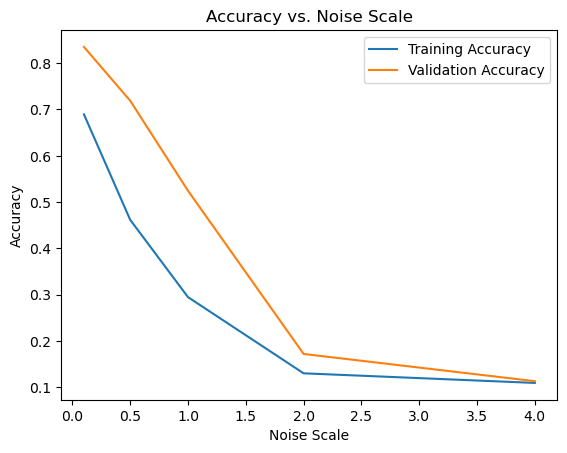

In [10]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape (define input_shape)
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the noise scales to use
noise_scales = [0.1, 0.5, 1.0, 2.0, 4.0]

# Prepare to collect accuracy data
train_accuracies = []
val_accuracies = []

# Loop over the noise scales and train and evaluate the model for each
for i, scale in enumerate(noise_scales, start=1):
    # Create a new model for each noise level
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    
    # Add noise to the training and testing data
    noisy_x_train = add_noise(x_train, noise_scale=scale)
    noisy_x_test = add_noise(x_test, noise_scale=scale)
    
    history = model.fit(noisy_x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(noisy_x_test, y_test))
    
    # Store the accuracies
    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])

    # Print when iteration is done
    print(f"Iteration {i} of 5 complete. Noise scale = {scale}.")
    
# Plot the accuracies
plt.plot(noise_scales, train_accuracies, label='Training Accuracy')
plt.plot(noise_scales, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy vs. Noise Scale')
plt.xlabel('Noise Scale')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Question 4
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Solution to Question 4

Used the droprate, optimizers, and neurons from this week in last week's MultiLayer model to more fairly compare with ConvNet model of this weeks; however, my Accuracy and Loss scores for both models are not good. Possibily due to needing more Epochs or not using the appropriate configuration of droprate, optimizers, activation function, and/or other inputs. 

Last Week, Multilayer Perceptron:
Accuracy w/o Noise = 76% & Loss w/o Noise = 148%
Accuracy w/Noise = 39% & Loss w/Noise = 205%

This Week, ConvNet: 
Accuracy w/o Noise = 82% & Loss w/o Noise = 84%
Accuracy w/Noise = 73% & Loss w/Noise = 155%

It's worth nothing that all else equal, using the Adam optimizer improves the Accuracy & Loss score compared to the Adadelta optimizer.

## MultiLayer Perceptron

## Model w/o Noise

In [14]:
batch_size = 128
num_classes = 10
epochs = 12

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape datasets
x_train_flat = x_train.reshape(60000, 784)  
x_test_flat = x_test.reshape(10000, 784)  

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,  # Use the correctly flattened data
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_flat, y_test))
score = model.evaluate(x_test_flat, y_test, verbose=0)  # Use the correctly flattened data
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1029 - loss: 2.4078 - val_accuracy: 0.1486 - val_loss: 2.2680
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1357 - loss: 2.3113 - val_accuracy: 0.2452 - val_loss: 2.1854
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1696 - loss: 2.2387 - val_accuracy: 0.3806 - val_loss: 2.1098
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2205 - loss: 2.1689 - val_accuracy: 0.4970 - val_loss: 2.0376
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2672 - loss: 2.1028 - val_accuracy: 0.5730 - val_loss: 1.9666
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3173 - loss: 2.0397 - val_accuracy: 0.6216 - val_loss: 1.8960
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3614 - loss: 1.9775 - val_accuracy: 0.6574 - val_loss: 1.8257
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4002 - loss: 1.9166 - val_accuracy:

## Model w/Noise

In [18]:

noise_scale = 0.5
num_classes = 10

# Load and normalize the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Add_noise function
def add_noise(data, noise_scale=noise_scale):
    noisy_data = data + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)  # Ensure the noisy data is still in [0, 1] range
    return noisy_data

# Add noise
noisy_x_train = add_noise(x_train, noise_scale=noise_scale)
noisy_x_test = add_noise(x_test, noise_scale=noise_scale)

# Reshape datasets to flatten them
noisy_x_train_flat = noisy_x_train.reshape(-1, 784)  # Flatten training data
noisy_x_test_flat = noisy_x_test.reshape(-1, 784)    # Flatten testing data


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the model
history = model.fit(noisy_x_train_flat, y_train,
                    batch_size=128,
                    epochs=12,
                    verbose=1,
                    validation_data=(noisy_x_test_flat, y_test))

# Evaluate the model
score = model.evaluate(noisy_x_test_flat, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0959 - loss: 2.5092 - val_accuracy: 0.1075 - val_loss: 2.3399
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1052 - loss: 2.4362 - val_accuracy: 0.1324 - val_loss: 2.3016
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1148 - loss: 2.3879 - val_accuracy: 0.1569 - val_loss: 2.2706
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1190 - loss: 2.3574 - val_accuracy: 0.1851 - val_loss: 2.2432
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1346 - loss: 2.3185 - val_accuracy: 0.2143 - val_loss: 2.2180
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1472 - loss: 2.2860 - val_accuracy: 0.2432 - val_loss: 2.1941
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1601 - loss: 2.2651 - val_accuracy: 0.2705 - val_loss: 2.1710
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1710 - loss: 2.2399 - val_accuracy: